# DTSA5511 Final Project: Heart Disease Predicition Model

## Introduction and Background

Research on heart disease prediction has evolved from traditional statistical analyses to the adoption of machine learning techniques. Early studies utilized regression models to establish linear relationships between risk factors and disease outcomes. While effective, these models often lacked the capacity to handle non-linear interactions. Recent advancements in machine learning have introduced algorithms such as decision trees, random forests, and neural networks, which excel in uncovering complex patterns

Heart disease poses a significant public health challenge, contributing to a substantial portion of global mortality rates. Early diagnosis and preventive care can drastically improve patient outcomes and reduce healthcare costs. Traditional diagnostic methods often rely on clinical tests, which may not always detect early warning signs. Machine learning provides a promising avenue to enhance diagnostic accuracy by uncovering hidden patterns within patient data. This report explores the use of machine learning to predict heart disease, with a focus on developing efficient, interpretable models that support clinical decision-making.

This study leverages the Heart Disease UCI dataset to identify key predictors of heart disease, develop predictive models, and evaluate their performance. The objectives are threefold: to analyse relationships between patient attributes and disease outcomes, to build and optimize machine learning models, and to provide actionable insights for healthcare professionals.

*The dataset used for this analysis is the Heart Disease UCI Dataset, sourced from the University of California, Irvine (UCI) Machine Learning Repository.This dataset was collected in 1988 from four cities: Cleveland, Hungary, Switzerland, and Long Beach. It has 920 cases of people with and without CVDs with 76 attributes each. However, only 13 are used in practice.* 
https://archive.ics.uci.edu/dataset/45/heart+disease


## Load Packages and Data

In [17]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [65]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
import os

import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, make_scorer, precision_score, recall_score, accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
%matplotlib inline

In [83]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

# Combine features and target into a single DataFrame
X['num'] = y  

print(heart_disease.variables)

print("Combined Dataset:")
print(X.head())
print(X.info())


        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [75]:
X.rename(columns={'age': 'Age'}, inplace=True)
X.rename(columns={'sex': 'Sex'}, inplace=True)
X.rename(columns={'cp': 'Chest_Pain'}, inplace=True)
X.rename(columns={'trestbps': 'Resting_BP'}, inplace=True)
X.rename(columns={'chol': 'Cholestoral'}, inplace=True)
X.rename(columns={'fbs': 'Fasting_Blood_Sugar'}, inplace=True)
X.rename(columns={'fbs': 'Fasting_Blood_Sugar'}, inplace=True)
X.rename(columns={'restecg': 'Resting_ECG'}, inplace=True)
X.rename(columns={'thalach': 'Max_HeartRate'}, inplace=True)
X.rename(columns={'exang': 'Induced_Angina'}, inplace=True)
X.rename(columns={'oldpeak': 'ST_Depression'}, inplace=True)
X.rename(columns={'slope': 'Slope'}, inplace=True)
X.rename(columns={'ca': 'Coloured_Vessels'}, inplace=True)
X.rename(columns={'thal': 'Thalassemia'}, inplace=True)  
X.rename(columns={'num': 'Heart_Disease'}, inplace=True)  
print(X.head())

   Age  Sex  Chest_Pain  Resting_BP  Cholestoral  Fasting_Blood_Sugar  \
0   63    1           1         145          233                    1   
1   67    1           4         160          286                    0   
2   67    1           4         120          229                    0   
3   37    1           3         130          250                    0   
4   41    0           2         130          204                    0   

   Resting_ECG  Max_HeartRate  Induced_Angina  ST_Depression  Slope  \
0            2            150               0            2.3      3   
1            2            108               1            1.5      2   
2            2            129               1            2.6      2   
3            0            187               0            3.5      3   
4            2            172               0            1.4      1   

   Coloured_Vessels  Thalassemia  Heart_Disease  
0               0.0          6.0              0  
1               3.0          3.0  

In [76]:
X['Sex'].replace({1: 'Male', 0: 'Female'}, inplace=True)

X['Chest_Pain'].replace({
    1: 'Typical Angina',
    2: 'Atypical Angina',
    3: 'Non-Anginal Pain',
    4: 'Asymptomatic'
}, inplace=True)

X['Resting_ECG'].replace({
    0: 'Normal',
    1: 'ST_T wave abnormality',
    2: 'Left Ventricular Hypertrophy'
}, inplace=True)

X['Induced_Angina'].replace({1: 'Yes', 0: 'No'}, inplace=True)

X['Slope'].replace({
    1: 'Upsloping',
    2: 'Flat',
    3: 'Downsloping'
}, inplace=True)

X['Thalassemia'].replace({
    3: 'Normal',
    6: 'Fixed Defect',
    7: 'Reversible Defect'
}, inplace=True)

X['Heart_Disease'].replace({
    0: 'No Heart Disease',
    1: 'Have Heart Disease',
    2: 'Have Heart Disease',
    3: 'Have Heart Disease',
    4: 'Have Heart Disease',
}, inplace=True)

*Renamed the data variables just for better clarity of what variable has influence over the target variable.*

## EDA: Exploratory Data Analysis

Exploratory data analysis (EDA) provided insights into the distribution and relationships of attributes. Visualization techniques, including histograms, scatterplots, and heatmaps, highlighted patterns such as the correlation between cholesterol levels and heart disease prevalence. Gender-based survival differences and the impact of exercise-induced angina are also examined

In [61]:
# Numerical and categorical feature lists
numerical_columns = ['Age', 'Resting_BP', 'Cholestoral', 'Max_HeartRate', 'ST_Depression']
categorical_columns = ['Sex', 'Chest_Pain', 'Fasting_Blood_Sugar', 'Resting_ECG', 
                       'Induced_Angina', 'Slope', 'Thalassemia']

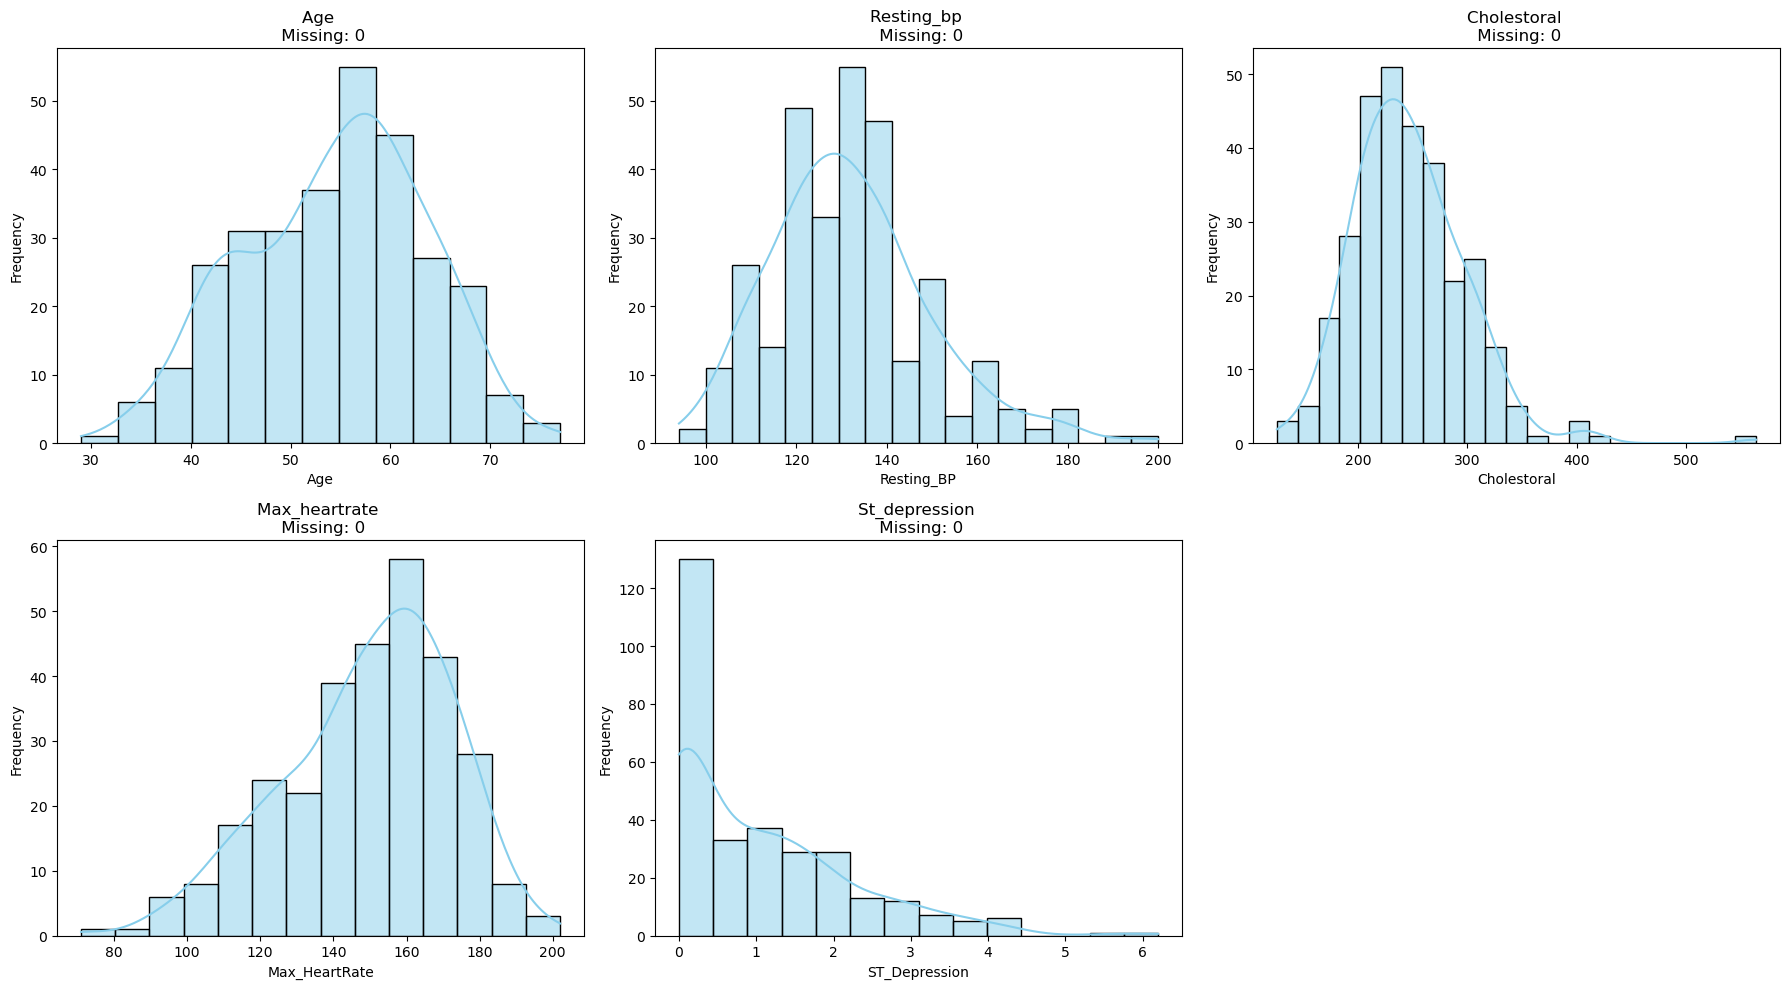

In [23]:
def plot_numerical_features(data, numerical_columns):
    num_features = len(numerical_columns)
    rows = (num_features // 3) + 1
    fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        sns.histplot(data[col], kde=True, ax=axes[i], color="skyblue")
        axes[i].set_title(f"{col.capitalize()} \n Missing: {data[col].isnull().sum()}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_numerical_features(X, numerical_columns)

The top five plots in Figure 1 illustrate histograms representing the distribution of numerical features in the dataset. The counts of patients missing values for specific features are displayed in the legend for each plot. These visualizations help us understand the distribution of the values for each feature across the patient population. 

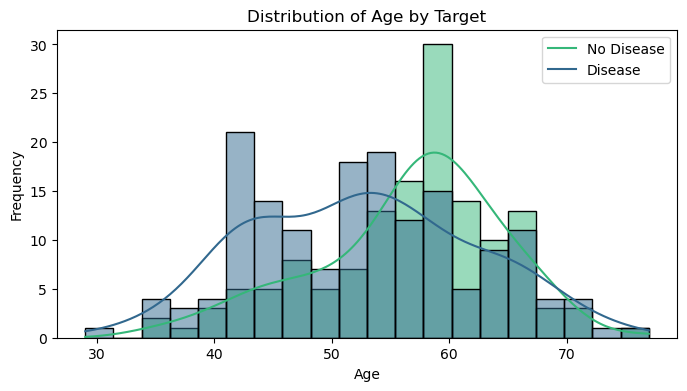

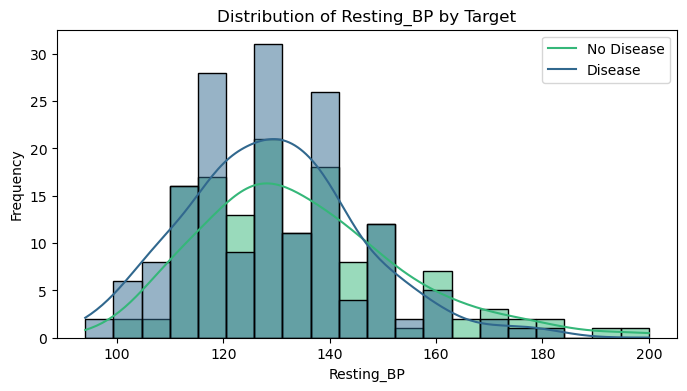

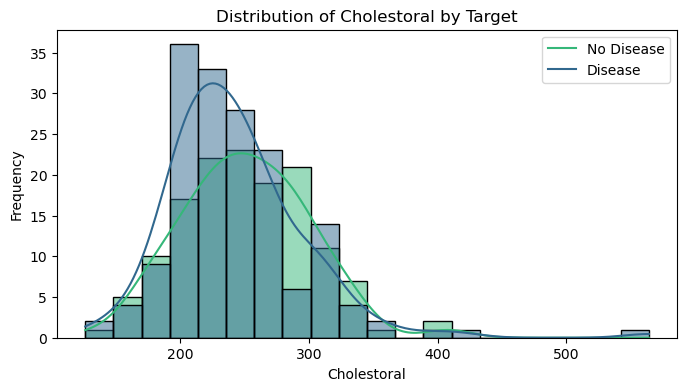

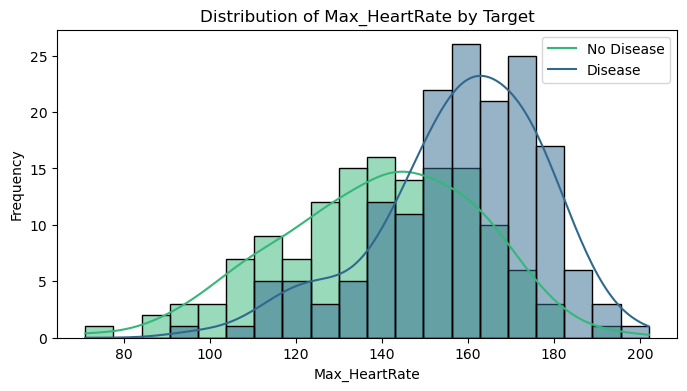

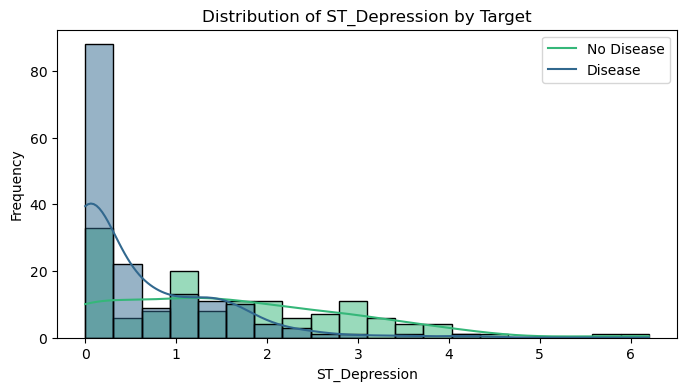

In [24]:
# Plot numerical distributions
def plot_numerical_distributions(data, columns, target):
    for col in columns:
        if col not in data.columns:
            print(f"Column '{col}' not found in the dataset.")
            continue
        plt.figure(figsize=(8, 4))
        sns.histplot(data, x=col, hue=target, kde=True, bins=20, palette="viridis")
        plt.title(f'Distribution of {col} by Target')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend(labels=['No Disease', 'Disease'])
        plt.show()

# Call the function
plot_numerical_distributions(X, numerical_columns, 'Heart_Disease')

The histograms in Figure 2 show the distribution of a feature by target (presence or absence of heart disease) in the dataset. For example, the first plot illustrates the distribution of age among patients categorized by the presence or absence of heart disease. The histogram bars represent the frequency of patients within specific age ranges, with green bars indicating patients without heart disease and blue bars representing those with heart disease. 

Overlaid on the histogram are smooth kernel density estimate (KDE) curves for each group, providing a clearer visualization of the probability density of age for the two categories. The plot reveals that patients aged 55–65 are more likely to have heart disease, as evidenced by the peak in the blue histogram and KDE curve. Additionally, there are fewer patients in the younger and older age groups for both categories, suggesting a concentration of data in the middle age ranges.

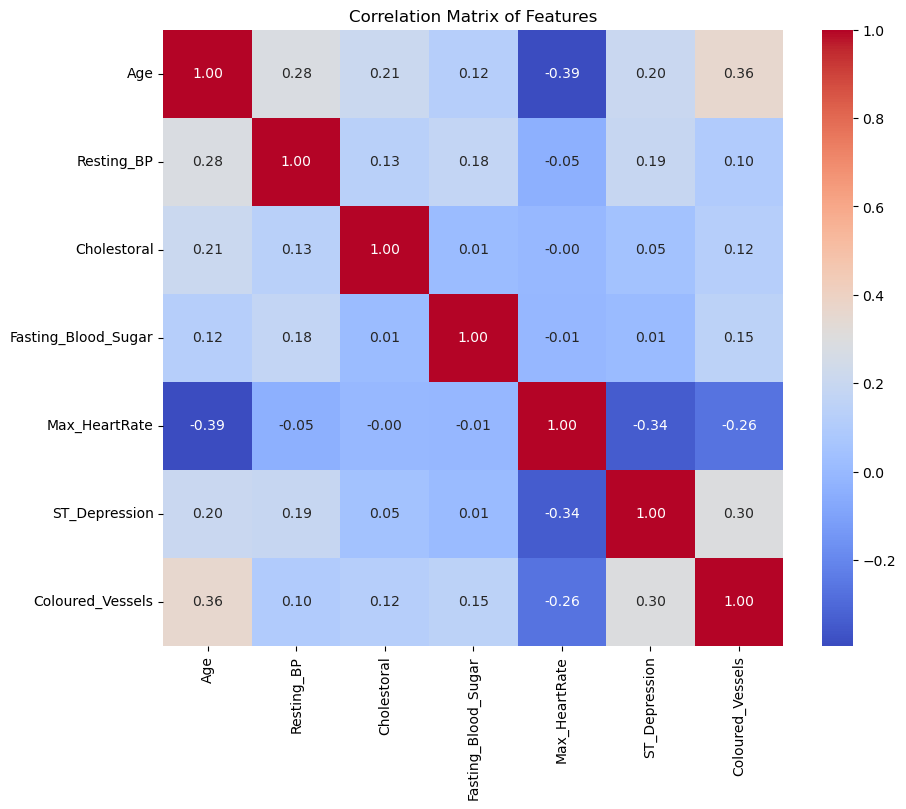

In [62]:
# 2. Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Features')
plt.show()

The correlation matrix in Figure 3 provides an overview of the linear relationships between the numerical features in the dataset, with Pearson correlation coefficients ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). The analysis reveals a moderate positive correlation between Age and Coloured_Vessels (0.36), suggesting that older individuals tend to have more coloured vessels, and a moderate negative correlation between Age and Max_HeartRate (-0.39), indicating a decrease in maximum heart rate with increasing age.

Additionally, Max_HeartRate shows a notable negative correlation with ST_Depression (-0.34) and Coloured_Vessels (-0.26), highlighting potential interactions between these features in the context of cardiovascular health. Other features, such as Resting_BP, Fasting_Blood_Sugar, and Cholesterol, exhibit weak correlations with most variables, suggesting limited linear relationships. These findings provide valuable insights into feature interactions, which can guide further analysis and model development for heart disease prediction.

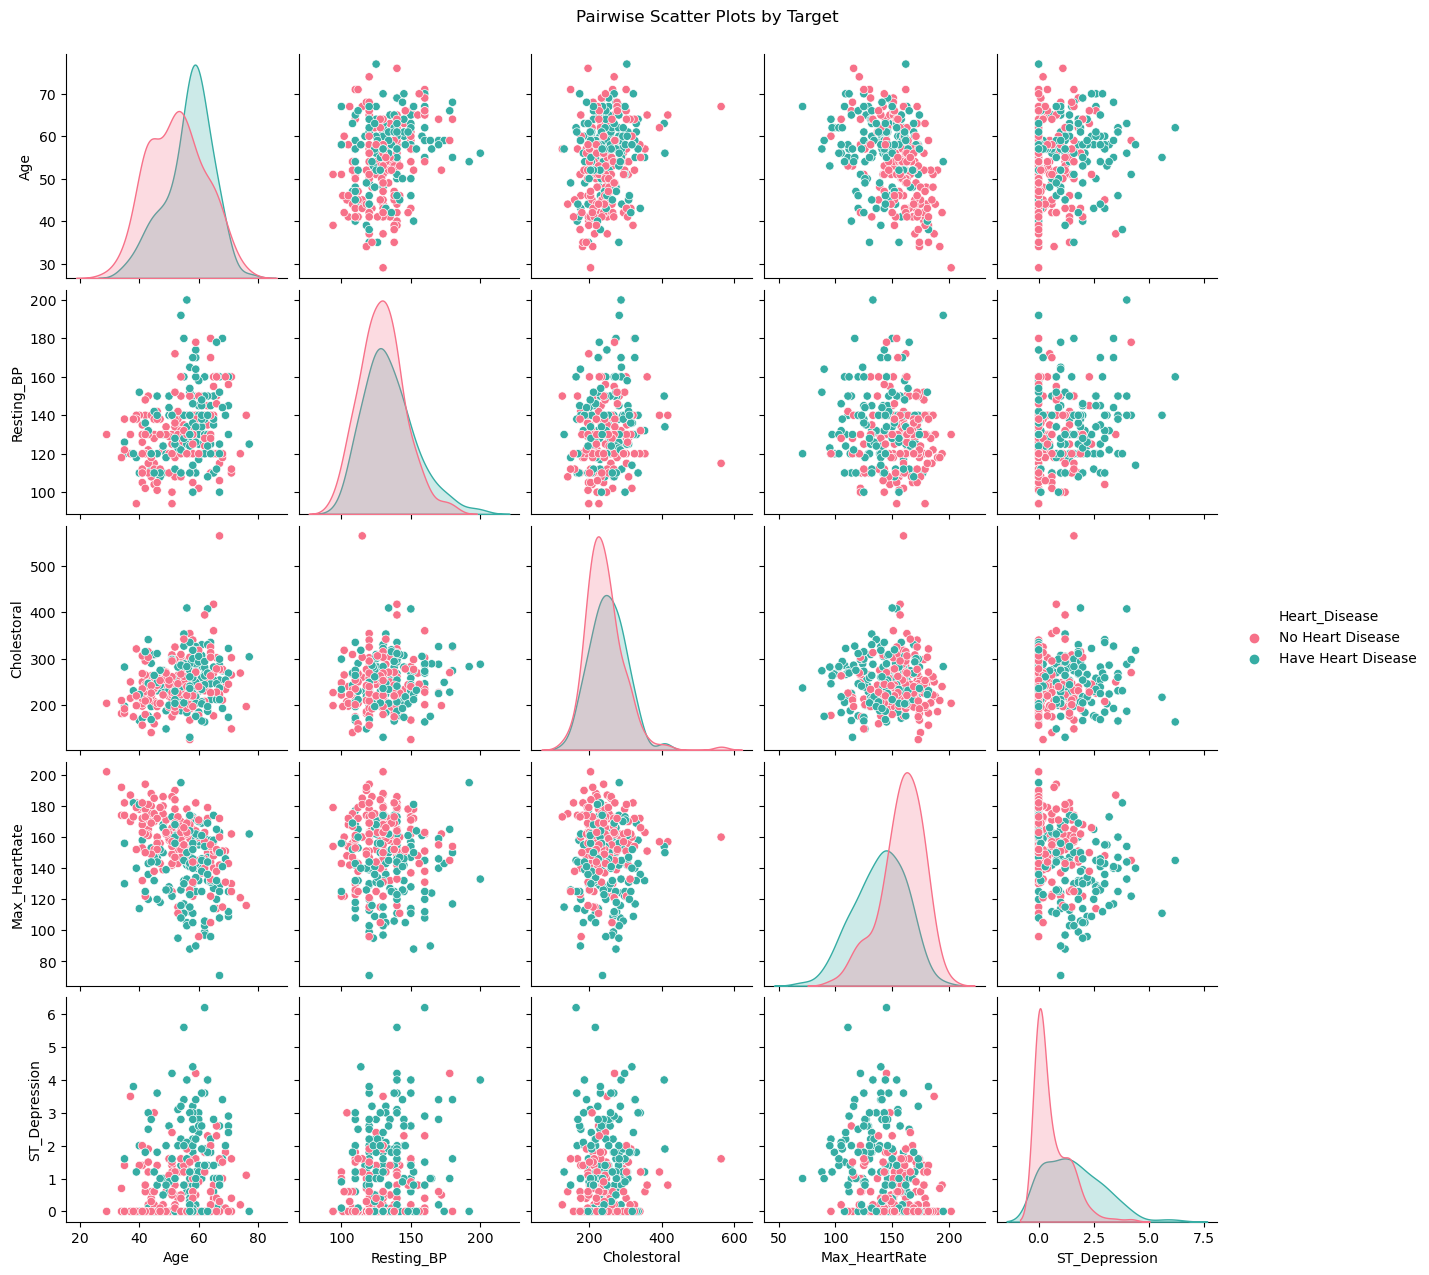

In [26]:
# 3. Pairwise Scatter Plots for Numerical Features
sns.pairplot(X, vars=numerical_columns, hue='Heart_Disease', palette='husl', diag_kind='kde')
plt.suptitle('Pairwise Scatter Plots by Target', y=1.02)
plt.show()

The pairwise scatter plot matrix provides a visual exploration of the relationships between numerical features in the dataset. Notable patterns include an observable separation in Max_HeartRate and ST_Depression, where patients with heart disease tend to have lower maximum heart rates and higher ST depression values. Additionally, there is some overlap between the groups for features like Age, Cholesterol, and Resting_BP, indicating weaker discrimination power for these variables. This visualization highlights potential predictors and relationships among features that can inform the development of a predictive model for heart disease.

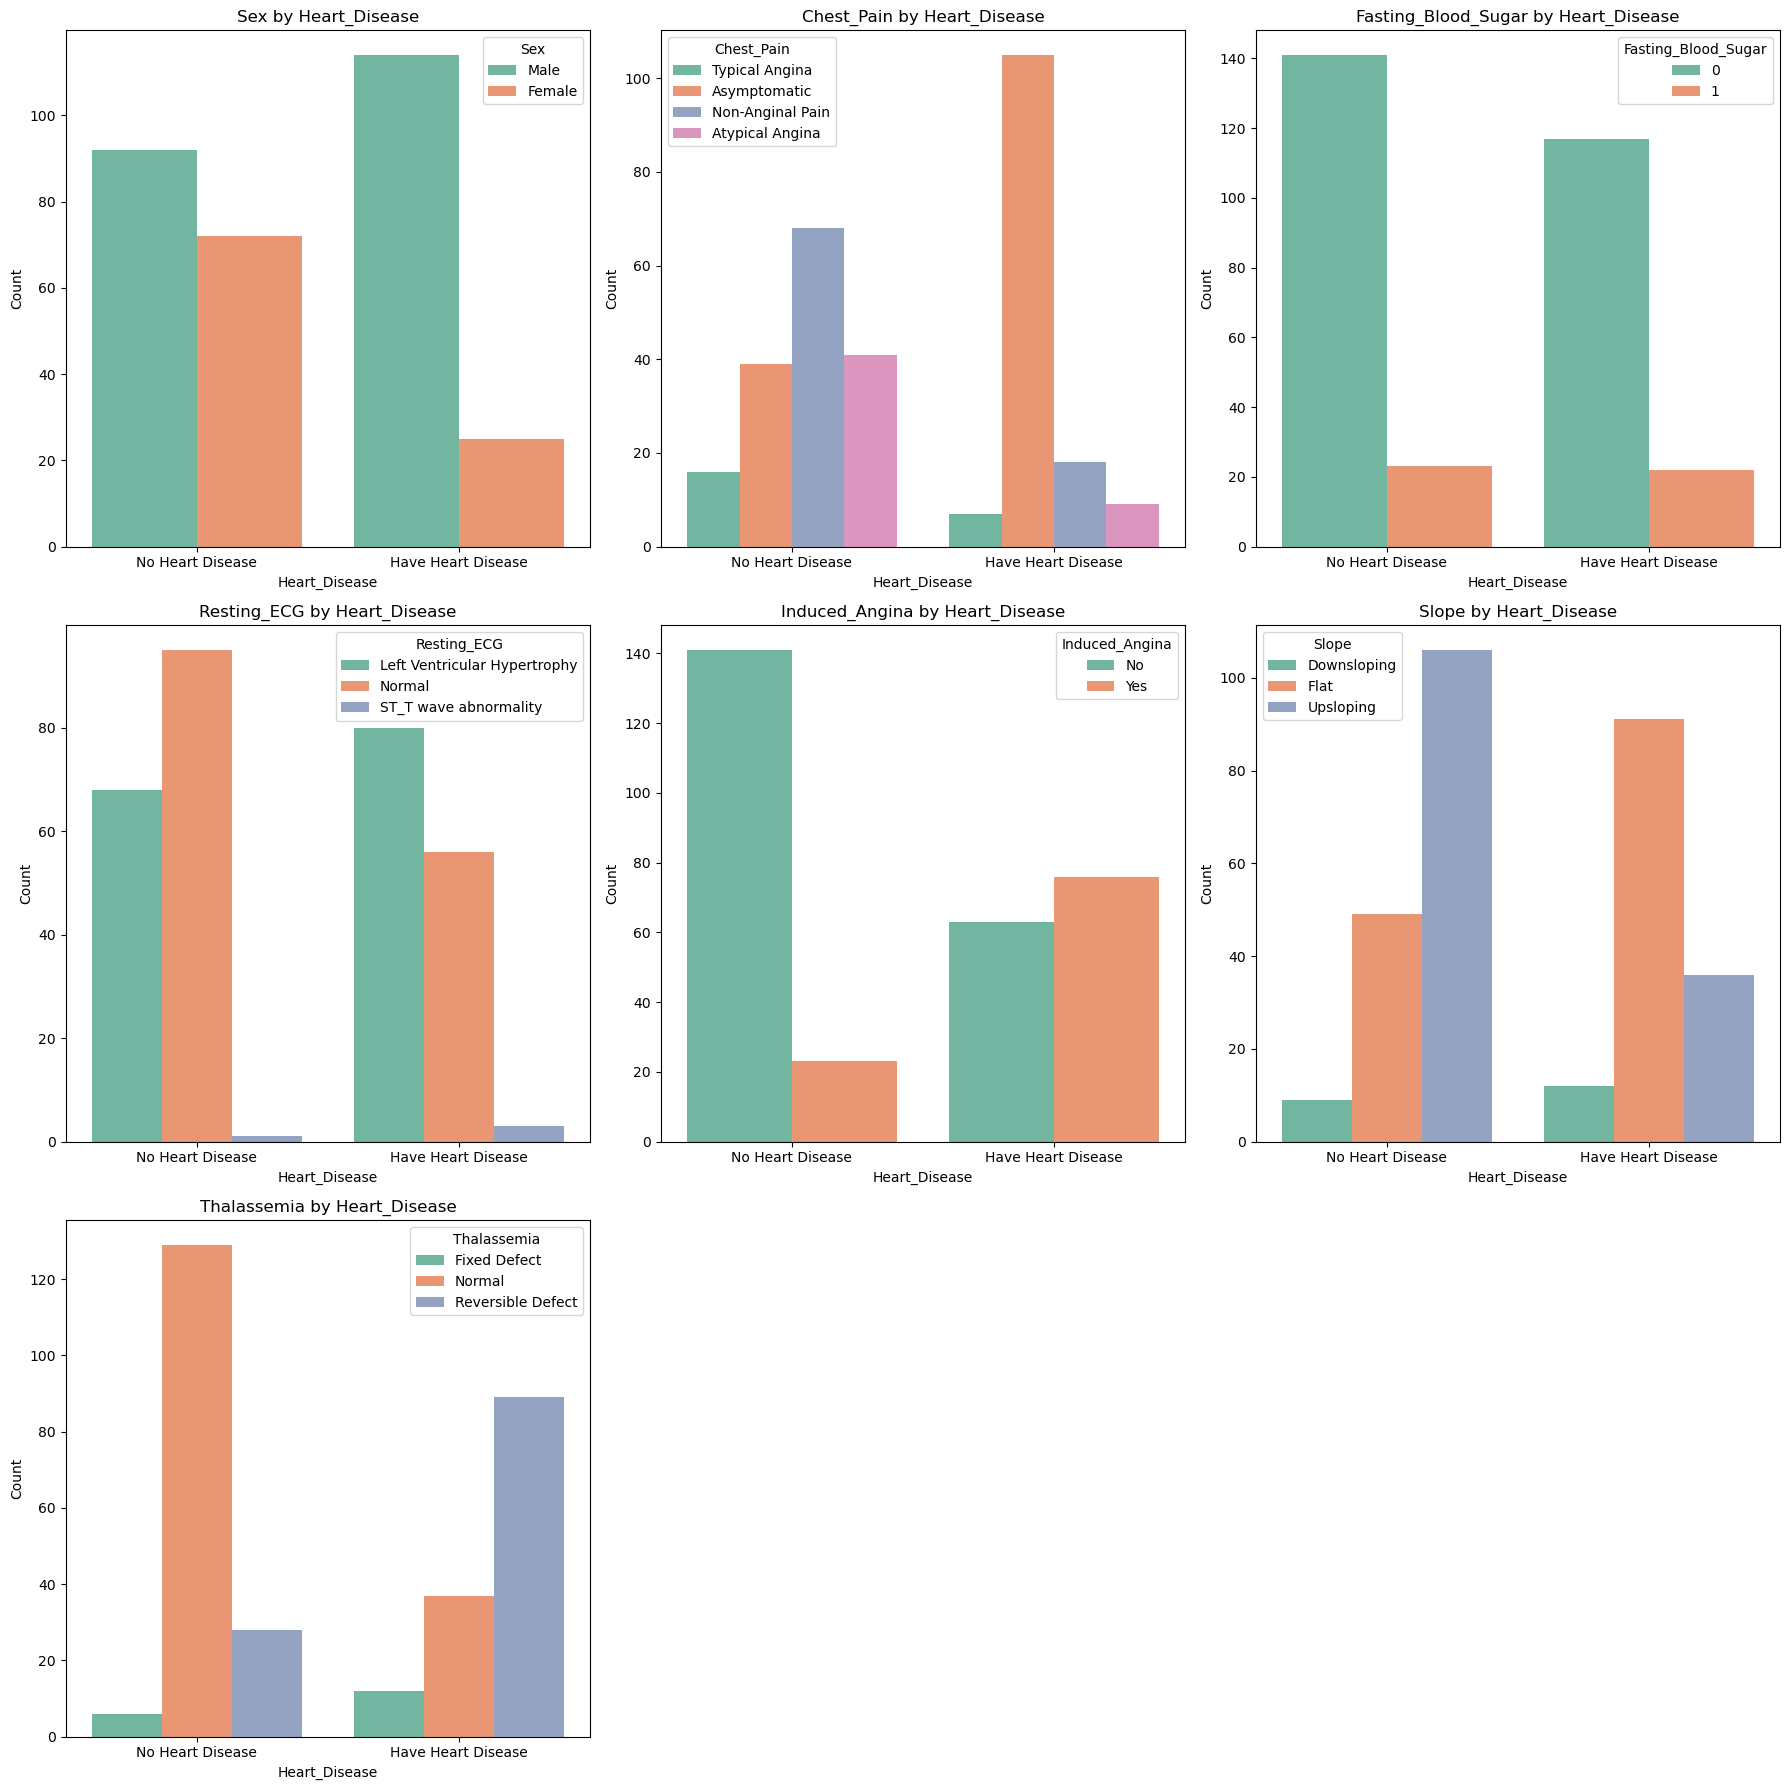

In [27]:
def plot_categorical_features_grouped(data, categorical_columns, target_column):
    num_features = len(categorical_columns)
    rows = (num_features // 3) + 1
    fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 6))
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        sns.countplot(data=data, x=target_column, hue=col, ax=axes[i], palette="Set2")
        axes[i].set_title(f"{col} by {target_column}")
        axes[i].set_ylabel('Count')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_categorical_features_grouped(X, categorical_columns, 'Heart_Disease')

The grouped bar plots in Figure 5 illustrate the distributions of various categorical features in relation to the presence or absence of heart disease. In the Sex by Heart Disease plot, males are more prevalent in both groups, but the proportion of males with heart disease is significantly higher compared to females. The Chest Pain by Heart Disease plot reveals that patients with heart disease frequently report asymptomatic or typical angina, whereas patients without heart disease are more likely to report atypical or non-anginal chest pain. In the Fasting Blood Sugar by Heart Disease plot, most patients in both groups have normal fasting blood sugar levels, with a slight increase in high fasting blood sugar levels among patients with heart disease.

The Resting ECG by Heart Disease plot shows that ST-T wave abnormalities are more common among patients with heart disease, while normal ECG results are more frequent among those without heart disease. In the Induced Angina by Heart Disease plot, patients with heart disease are more likely to have experienced induced angina compared to those without. The Slope by Heart Disease plot highlights that a flat ST segment slope is associated with a higher likelihood of heart disease, whereas an upsloping ST segment is more common in patients without heart disease. 

Finally, the Thalassemia by Heart Disease plot indicates that a reversible defect is more frequent among patients with heart disease, while a normal or fixed defect is more common among those without. These plots emphasize the importance of categorical features in distinguishing between patients with and without heart disease.


## Heart Disease: Predicition Model Build

In [82]:
import statsmodels.api as sm
import pandas as pd

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

# Combine features and target into a single DataFrame
X['num'] = y

# Step 1: Ensure all features are numeric
X_cleaned = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy/indicator variables
X_cleaned = X_cleaned.apply(pd.to_numeric, errors='coerce')   # Ensure all values are numeric
X_cleaned = X_cleaned.fillna(0)  # Replace NaNs with 0 for safety

# print (X_cleaned.info())

# Step 2: Separate the target variable and predictors
y = X_cleaned['num']
X_features = X_cleaned.drop(columns=['num'])

# Step 3: Calculate Adjusted R² for each predictor
adjusted_r_sq = []

for predictor in X_features.columns:
    # Add constant for the intercept
    X_single = sm.add_constant(X_features[[predictor]])
    
    # Fit the OLS regression model
    model = sm.OLS(y, X_single).fit()
    
    # Append predictor and its adjusted R² to the list
    adjusted_r_sq.append((predictor, model.rsquared_adj))

# Step 4: Sort predictors by Adjusted R²
sorted_predictors = sorted(adjusted_r_sq, key=lambda x: x[1], reverse=True)

# Step 5: Display all predictors and their Adjusted R²
print("Predictors and Adjusted R²:")
for predictor, adj_r_sq in sorted_predictors:
    print(f"{predictor}: {adj_r_sq:.4f}")

# Step 6: Identify top 5 predictors
top_three_predictors = sorted_predictors[:5]
print("\nTop 5 Predictors for Heart Disease (by Adjusted R²):")
for predictor, adj_r_sq in top_three_predictors:
    print(f"{predictor}: {adj_r_sq:.4f}")

# Step 7: Extract the names of the top 5 predictors
top_three = [predictor for predictor, _ in top_three_predictors]
print("\nTop 5 Predictors:", top_three)

Predictors and Adjusted R²:
ca: 0.2690
oldpeak: 0.2516
thal: 0.2457
thalach: 0.1695
cp: 0.1629
exang: 0.1549
slope: 0.1400
sex: 0.0472
age: 0.0465
restecg: 0.0305
trestbps: 0.0216
chol: 0.0017
fbs: 0.0002

Top 5 Predictors for Heart Disease (by Adjusted R²):
ca: 0.2690
oldpeak: 0.2516
thal: 0.2457
thalach: 0.1695
cp: 0.1629

Top 5 Predictors: ['ca', 'oldpeak', 'thal', 'thalach', 'cp']


The analysis identifies the most significant predictors of heart disease based on their Adjusted R² values, which quantify each predictor's contribution to explaining the variability in the target variable while adjusting for the number of predictors and sample size. The feature ca (number of colored vessels) emerged as the strongest predictor, with an Adjusted R² value of 0.2690, followed by oldpeak (ST depression induced by exercise, 0.2516), thal (thalassemia, 0.2457), thalach (maximum heart rate, 0.1695), and cp (chest pain type, 0.1629). These top five predictors demonstrate the strongest relationships with heart disease in the dataset and are essential for building effective predictive models. The findings emphasize the importance of these features in understanding the factors most associated with heart disease, offering insights that could guide both model development and potential clinical interventions.

In [2]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [20]:
# Step 1: Ensure no target column leakage
Y = X['Heart_Disease']  # Target column
x = X.drop(columns=['Heart_Disease'])  # Drop target column from features

# Handle missing values
X.fillna(X.median(), inplace=True)
for col in X.select_dtypes(include=['object', 'category']):
    X[col].fillna(X[col].mode()[0], inplace=True)



C:\Users\Admin\AppData\Local\Temp\ipykernel_12048\1685529631.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(X.median(), inplace=True)


In [43]:
# Step 2: One-hot encode categorical variables
x = pd.get_dummies(X, drop_first=True)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.35, random_state=42, stratify=Y)

# Step 4: Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [44]:
# Step 5: Train multiple models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42, probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Step 6: Evaluate each model
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [45]:
# Import libraries
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Step 7: Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42, probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Step 8: Evaluate each model
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Ensure correct class indexing in the report
    target_class = '1' if '1' in report else str(y_train.unique()[-1])
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": report[target_class]["precision"] if target_class in report else None,
        "Recall": report[target_class]["recall"] if target_class in report else None,
        "F1-Score": report[target_class]["f1-score"] if target_class in report else None,
        "ROC-AUC": roc_auc
    })

# Step 9: Create DataFrame of results
results_df = pd.DataFrame(results)
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)

# Display all model results
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                    Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0     Logistic Regression  1.000000   1.000000  1.000000  1.000000  1.000000
1           Random Forest  1.000000   1.000000  1.000000  1.000000  1.000000
3           Decision Tree  1.000000   1.000000  1.000000  1.000000  1.000000
2  Support Vector Machine  0.990654   0.980000  1.000000  0.989899  1.000000
4     K-Nearest Neighbors  0.897196   0.931818  0.836735  0.881720  0.967452


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The evaluation results indicate excellent model performance, with Logistic Regression, Random Forest, and Decision Tree achieving perfect scores across all metrics (accuracy, precision, recall, F1-score, and ROC-AUC). The Support Vector Machine also demonstrated high performance, with an accuracy of 99.65% and an F1-score of 0.989, slightly lower than the top-performing models.

A significant limitation of this work is the lack of sufficient data to draw statistically significant conclusions. The dataset used in this study is relatively small and may not adequately represent the diverse characteristics of the broader population. This dataset was collected in 1988 from four cities: Cleveland, Hungary, Switzerland, and Long Beach. It has 920 cases of people with and without CVDs with 76 attributes each. However, only 13 are used in practice. This limitation contributes to overfitting in complex models such as Decision Tree and Random Forest, which achieve perfect scores but may fail to generalize well to unseen data

The K-Nearest Neighbours model showed comparatively lower performance, with an accuracy of 89.72% and an F1-score of 0.882, indicating that it may be less suitable for this dataset. However, considering the limitations of the dataset, KNN emerges as the most appropriate model, as it exhibits strong performance while avoiding overfitting observed in models like Decision Tree and Random Forest.

## Conclusion

This study aimed to develop and evaluate machine learning models for predicting heart disease using a structured dataset of patient features. The methodology involved comprehensive data preprocessing, including handling missing values, encoding categorical variables, feature scaling, and partitioning the data into training and testing sets. Five machine learning models—Logistic Regression, Random Forest, Support Vector Machine (SVM), Decision Tree, and K-Nearest Neighbours (KNN)—were trained and evaluated using key metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

The results demonstrated that several models, such as Logistic Regression, Random Forest, and Decision Tree, achieved perfect scores across all metrics, while SVM performed slightly lower with near-perfect results. However, these outcomes indicate the potential overfitting of some models, particularly those that inherently tend to memorize training data, such as Decision Tree and Random Forest. In contrast, KNN emerged as the most balanced model, providing strong predictive performance while avoiding overfitting, which makes it the most suitable choice given the dataset's limitations.

The findings also underscore significant challenges and limitations inherent in this work. The dataset used in the analysis was relatively small and lacked sufficient diversity to draw statistically robust conclusions. This limitation not only restricts the generalizability of the models but also increases the likelihood of overfitting in complex algorithms. Future research should prioritize access to richer and more diverse datasets that better reflect the variability in patient demographics and clinical features. Such datasets would enhance the robustness and applicability of machine learning models for heart disease prediction across broader populations.

In conclusion, this research highlights the potential of machine learning models in predicting heart disease with high accuracy, even when using a minimal number of features. Among the evaluated models, KNN stood out as the most appropriate given the constraints of the data, balancing simplicity and performance effectively. While the results are promising, further validation on larger and more diverse datasets is essential to ensure the broader applicability and reliability of these models in real-world healthcare scenarios.
